# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.exclude_past, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 13005 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.exclude_past, max_distance=2)


  0% (    1 of 13005) |            | Elapsed Time: 0:00:26 ETA:  4 days, 0:39:38

  0% (   74 of 13005) |                    | Elapsed Time: 0:00:27 ETA:  0:02:31

  1% (  145 of 13005) |                    | Elapsed Time: 0:00:28 ETA:  0:02:32

  1% (  163 of 13005) |                    | Elapsed Time: 0:00:29 ETA:  0:02:31

  1% (  240 of 13005) |                    | Elapsed Time: 0:00:30 ETA:  0:02:26

  2% (  326 of 13005) |                    | Elapsed Time: 0:00:31 ETA:  0:02:25

  3% (  394 of 13005) |                    | Elapsed Time: 0:00:32 ETA:  0:02:27

  3% (  464 of 13005) |                    | Elapsed Time: 0:00:33 ETA:  0:02:27

  3% (  488 of 13005) |                    | Elapsed Time: 0:00:33 ETA:  0:02:27

  4% (  556 of 13005) |                    | Elapsed Time: 0:00:34 ETA:  0:02:28

  4% (  624 of 13005) |                    | Elapsed Time: 0:00:35 ETA:  0:02:29

  5% (  651 of 13005) |#                   | Elapsed Time: 0:00:35 ETA:  0:02:29

  5% (  719 of 13005) |#                   | Elapsed Time: 0:00:36 ETA:  0:02:32

  6% (  792 of 13005) |#                   | Elapsed Time: 0:00:37 ETA:  0:02:32

  6% (  813 of 13005) |#                   | Elapsed Time: 0:00:38 ETA:  0:02:30

  6% (  891 of 13005) |#                   | Elapsed Time: 0:00:39 ETA:  0:02:26

  7% (  959 of 13005) |#                   | Elapsed Time: 0:00:40 ETA:  0:02:25

  7% (  976 of 13005) |#                   | Elapsed Time: 0:00:40 ETA:  0:02:24

  8% ( 1048 of 13005) |#                   | Elapsed Time: 0:00:41 ETA:  0:02:21

  8% ( 1138 of 13005) |#                   | Elapsed Time: 0:00:42 ETA:  0:02:16

  9% ( 1207 of 13005) |#                   | Elapsed Time: 0:00:43 ETA:  0:02:15

  9% ( 1278 of 13005) |#                   | Elapsed Time: 0:00:44 ETA:  0:02:14

 10% ( 1301 of 13005) |##                  | Elapsed Time: 0:00:45 ETA:  0:02:15

 10% ( 1359 of 13005) |##                  | Elapsed Time: 0:00:46 ETA:  0:02:22

 10% ( 1423 of 13005) |##                  | Elapsed Time: 0:00:47 ETA:  0:02:23

 11% ( 1464 of 13005) |##                  | Elapsed Time: 0:00:47 ETA:  0:02:22

 11% ( 1536 of 13005) |##                  | Elapsed Time: 0:00:48 ETA:  0:02:21

 12% ( 1626 of 13005) |##                  | Elapsed Time: 0:00:49 ETA:  0:02:21

 12% ( 1639 of 13005) |##                  | Elapsed Time: 0:00:50 ETA:  0:02:45

 13% ( 1709 of 13005) |##                  | Elapsed Time: 0:00:51 ETA:  0:02:45

 13% ( 1789 of 13005) |##                  | Elapsed Time: 0:00:52 ETA:  0:02:35

 14% ( 1860 of 13005) |##                  | Elapsed Time: 0:00:53 ETA:  0:02:31

 14% ( 1927 of 13005) |##                  | Elapsed Time: 0:00:54 ETA:  0:02:30

 15% ( 1951 of 13005) |###                 | Elapsed Time: 0:00:55 ETA:  0:02:32

 15% ( 2018 of 13005) |###                 | Elapsed Time: 0:00:56 ETA:  0:02:36

 16% ( 2087 of 13005) |###                 | Elapsed Time: 0:00:57 ETA:  0:02:32

 16% ( 2114 of 13005) |###                 | Elapsed Time: 0:00:57 ETA:  0:02:09

 16% ( 2183 of 13005) |###                 | Elapsed Time: 0:00:58 ETA:  0:02:08

 17% ( 2250 of 13005) |###                 | Elapsed Time: 0:00:59 ETA:  0:02:10

 17% ( 2276 of 13005) |###                 | Elapsed Time: 0:01:00 ETA:  0:02:10

 18% ( 2342 of 13005) |###                 | Elapsed Time: 0:01:01 ETA:  0:02:12

 18% ( 2415 of 13005) |###                 | Elapsed Time: 0:01:02 ETA:  0:02:08

 18% ( 2439 of 13005) |###                 | Elapsed Time: 0:01:02 ETA:  0:02:08

 19% ( 2512 of 13005) |###                 | Elapsed Time: 0:01:03 ETA:  0:02:04

 19% ( 2584 of 13005) |###                 | Elapsed Time: 0:01:04 ETA:  0:02:02

 20% ( 2601 of 13005) |####                | Elapsed Time: 0:01:04 ETA:  0:02:01

 20% ( 2676 of 13005) |####                | Elapsed Time: 0:01:05 ETA:  0:01:58

 21% ( 2748 of 13005) |####                | Elapsed Time: 0:01:06 ETA:  0:01:55

 21% ( 2764 of 13005) |####                | Elapsed Time: 0:01:06 ETA:  0:01:55

 21% ( 2837 of 13005) |####                | Elapsed Time: 0:01:07 ETA:  0:01:51

 22% ( 2909 of 13005) |####                | Elapsed Time: 0:01:08 ETA:  0:01:50

 22% ( 2927 of 13005) |####                | Elapsed Time: 0:01:09 ETA:  0:01:50

 23% ( 3000 of 13005) |####                | Elapsed Time: 0:01:10 ETA:  0:01:49

 23% ( 3072 of 13005) |####                | Elapsed Time: 0:01:11 ETA:  0:01:48

 23% ( 3089 of 13005) |####                | Elapsed Time: 0:01:11 ETA:  0:01:48

 24% ( 3163 of 13005) |####                | Elapsed Time: 0:01:12 ETA:  0:01:48

 25% ( 3252 of 13005) |#####               | Elapsed Time: 0:01:13 ETA:  0:01:45

 25% ( 3326 of 13005) |#####               | Elapsed Time: 0:01:14 ETA:  0:01:43

 26% ( 3395 of 13005) |#####               | Elapsed Time: 0:01:15 ETA:  0:01:44

 26% ( 3414 of 13005) |#####               | Elapsed Time: 0:01:15 ETA:  0:01:44

 26% ( 3487 of 13005) |#####               | Elapsed Time: 0:01:16 ETA:  0:01:43

 27% ( 3558 of 13005) |#####               | Elapsed Time: 0:01:17 ETA:  0:01:42

 27% ( 3577 of 13005) |#####               | Elapsed Time: 0:01:18 ETA:  0:01:41

 28% ( 3651 of 13005) |#####               | Elapsed Time: 0:01:19 ETA:  0:01:40

 28% ( 3724 of 13005) |#####               | Elapsed Time: 0:01:20 ETA:  0:01:40

 28% ( 3739 of 13005) |#####               | Elapsed Time: 0:01:20 ETA:  0:01:40

 29% ( 3808 of 13005) |#####               | Elapsed Time: 0:01:21 ETA:  0:01:41

 29% ( 3882 of 13005) |#####               | Elapsed Time: 0:01:22 ETA:  0:01:38

 30% ( 3902 of 13005) |######              | Elapsed Time: 0:01:22 ETA:  0:01:37

 30% ( 3976 of 13005) |######              | Elapsed Time: 0:01:23 ETA:  0:01:36

 31% ( 4050 of 13005) |######              | Elapsed Time: 0:01:24 ETA:  0:01:34

 31% ( 4065 of 13005) |######              | Elapsed Time: 0:01:24 ETA:  0:01:34

 31% ( 4134 of 13005) |######              | Elapsed Time: 0:01:25 ETA:  0:01:35

 32% ( 4206 of 13005) |######              | Elapsed Time: 0:01:26 ETA:  0:01:34

 32% ( 4227 of 13005) |######              | Elapsed Time: 0:01:27 ETA:  0:01:34

 33% ( 4302 of 13005) |######              | Elapsed Time: 0:01:28 ETA:  0:01:30

 33% ( 4390 of 13005) |######              | Elapsed Time: 0:01:29 ETA:  0:01:29

 34% ( 4463 of 13005) |######              | Elapsed Time: 0:01:30 ETA:  0:01:28

 34% ( 4536 of 13005) |######              | Elapsed Time: 0:01:31 ETA:  0:01:28

 35% ( 4552 of 13005) |#######             | Elapsed Time: 0:01:31 ETA:  0:01:27

 35% ( 4624 of 13005) |#######             | Elapsed Time: 0:01:32 ETA:  0:01:25

 36% ( 4715 of 13005) |#######             | Elapsed Time: 0:01:33 ETA:  0:01:23

 36% ( 4791 of 13005) |#######             | Elapsed Time: 0:01:34 ETA:  0:01:22

 37% ( 4858 of 13005) |#######             | Elapsed Time: 0:01:36 ETA:  0:01:48

 37% ( 4877 of 13005) |#######             | Elapsed Time: 0:01:37 ETA:  0:01:49

 38% ( 4948 of 13005) |#######             | Elapsed Time: 0:01:38 ETA:  0:01:48

 38% ( 5023 of 13005) |#######             | Elapsed Time: 0:01:39 ETA:  0:01:46

 38% ( 5040 of 13005) |#######             | Elapsed Time: 0:01:39 ETA:  0:01:46

 39% ( 5114 of 13005) |#######             | Elapsed Time: 0:01:40 ETA:  0:01:44

 39% ( 5187 of 13005) |#######             | Elapsed Time: 0:01:41 ETA:  0:01:45

 40% ( 5202 of 13005) |########            | Elapsed Time: 0:01:41 ETA:  0:01:45

 40% ( 5277 of 13005) |########            | Elapsed Time: 0:01:42 ETA:  0:01:44

 41% ( 5351 of 13005) |########            | Elapsed Time: 0:01:43 ETA:  0:01:15

 41% ( 5365 of 13005) |########            | Elapsed Time: 0:01:43 ETA:  0:01:15

 41% ( 5439 of 13005) |########            | Elapsed Time: 0:01:44 ETA:  0:01:13

 42% ( 5512 of 13005) |########            | Elapsed Time: 0:01:45 ETA:  0:01:12

 42% ( 5528 of 13005) |########            | Elapsed Time: 0:01:46 ETA:  0:01:12

 43% ( 5601 of 13005) |########            | Elapsed Time: 0:01:47 ETA:  0:01:12

 43% ( 5666 of 13005) |########            | Elapsed Time: 0:01:48 ETA:  0:01:14

 43% ( 5690 of 13005) |########            | Elapsed Time: 0:01:48 ETA:  0:01:12

 44% ( 5761 of 13005) |########            | Elapsed Time: 0:01:49 ETA:  0:01:13

 44% ( 5830 of 13005) |########            | Elapsed Time: 0:01:50 ETA:  0:01:14

 45% ( 5853 of 13005) |#########           | Elapsed Time: 0:01:50 ETA:  0:01:13

 45% ( 5929 of 13005) |#########           | Elapsed Time: 0:01:51 ETA:  0:01:11

 46% ( 6015 of 13005) |#########           | Elapsed Time: 0:01:52 ETA:  0:01:09

 46% ( 6086 of 13005) |#########           | Elapsed Time: 0:01:53 ETA:  0:01:09

 47% ( 6158 of 13005) |#########           | Elapsed Time: 0:01:54 ETA:  0:01:05

 47% ( 6178 of 13005) |#########           | Elapsed Time: 0:01:55 ETA:  0:01:05

 48% ( 6252 of 13005) |#########           | Elapsed Time: 0:01:56 ETA:  0:01:03

 48% ( 6319 of 13005) |#########           | Elapsed Time: 0:01:57 ETA:  0:01:03

 48% ( 6340 of 13005) |#########           | Elapsed Time: 0:01:57 ETA:  0:01:03

 49% ( 6410 of 13005) |#########           | Elapsed Time: 0:01:58 ETA:  0:01:04

 49% ( 6485 of 13005) |#########           | Elapsed Time: 0:01:59 ETA:  0:01:03

 50% ( 6503 of 13005) |##########          | Elapsed Time: 0:01:59 ETA:  0:01:02

 50% ( 6580 of 13005) |##########          | Elapsed Time: 0:02:00 ETA:  0:00:59

 51% ( 6666 of 13005) |##########          | Elapsed Time: 0:02:01 ETA:  0:00:56

 51% ( 6743 of 13005) |##########          | Elapsed Time: 0:02:02 ETA:  0:00:54

 52% ( 6803 of 13005) |##########          | Elapsed Time: 0:02:03 ETA:  0:00:55

 52% ( 6828 of 13005) |##########          | Elapsed Time: 0:02:04 ETA:  0:00:58

 53% ( 6893 of 13005) |##########          | Elapsed Time: 0:02:05 ETA:  0:00:58

 53% ( 6964 of 13005) |##########          | Elapsed Time: 0:02:06 ETA:  0:00:59

 53% ( 6991 of 13005) |##########          | Elapsed Time: 0:02:06 ETA:  0:00:58

 54% ( 7066 of 13005) |##########          | Elapsed Time: 0:02:07 ETA:  0:00:58

 55% ( 7153 of 13005) |###########         | Elapsed Time: 0:02:08 ETA:  0:00:58

 55% ( 7230 of 13005) |###########         | Elapsed Time: 0:02:09 ETA:  0:00:57

 56% ( 7301 of 13005) |###########         | Elapsed Time: 0:02:10 ETA:  0:00:52

 56% ( 7316 of 13005) |###########         | Elapsed Time: 0:02:11 ETA:  0:00:49

 56% ( 7387 of 13005) |###########         | Elapsed Time: 0:02:12 ETA:  0:00:46

 57% ( 7459 of 13005) |###########         | Elapsed Time: 0:02:13 ETA:  0:00:45

 57% ( 7478 of 13005) |###########         | Elapsed Time: 0:02:13 ETA:  0:00:46

 57% ( 7539 of 13005) |###########         | Elapsed Time: 0:02:14 ETA:  0:00:50

 58% ( 7611 of 13005) |###########         | Elapsed Time: 0:02:15 ETA:  0:00:50

 58% ( 7641 of 13005) |###########         | Elapsed Time: 0:02:15 ETA:  0:00:48

 59% ( 7716 of 13005) |###########         | Elapsed Time: 0:02:16 ETA:  0:00:48

 59% ( 7787 of 13005) |###########         | Elapsed Time: 0:02:17 ETA:  0:00:47

 60% ( 7803 of 13005) |############        | Elapsed Time: 0:02:18 ETA:  0:00:46

 60% ( 7880 of 13005) |############        | Elapsed Time: 0:02:19 ETA:  0:00:43

 61% ( 7966 of 13005) |############        | Elapsed Time: 0:02:20 ETA:  0:00:40

 61% ( 8040 of 13005) |############        | Elapsed Time: 0:02:21 ETA:  0:00:34

 62% ( 8129 of 13005) |############        | Elapsed Time: 0:02:22 ETA:  0:00:31

 63% ( 8203 of 13005) |############        | Elapsed Time: 0:02:23 ETA:  0:00:30

 63% ( 8291 of 13005) |############        | Elapsed Time: 0:02:24 ETA:  0:00:28

 64% ( 8365 of 13005) |############        | Elapsed Time: 0:02:25 ETA:  0:00:28

 65% ( 8454 of 13005) |#############       | Elapsed Time: 0:02:26 ETA:  0:00:27

 65% ( 8530 of 13005) |#############       | Elapsed Time: 0:02:27 ETA:  0:00:25

 66% ( 8616 of 13005) |#############       | Elapsed Time: 0:02:29 ETA:  0:00:27

 66% ( 8686 of 13005) |#############       | Elapsed Time: 0:02:30 ETA:  0:00:27

 67% ( 8759 of 13005) |#############       | Elapsed Time: 0:02:31 ETA:  0:00:27

 67% ( 8779 of 13005) |#############       | Elapsed Time: 0:02:31 ETA:  0:00:26

 68% ( 8844 of 13005) |#############       | Elapsed Time: 0:02:33 ETA:  0:01:02

 68% ( 8913 of 13005) |#############       | Elapsed Time: 0:02:34 ETA:  0:01:04

 68% ( 8941 of 13005) |#############       | Elapsed Time: 0:02:34 ETA:  0:01:03

 69% ( 9013 of 13005) |#############       | Elapsed Time: 0:02:35 ETA:  0:01:04

 69% ( 9084 of 13005) |#############       | Elapsed Time: 0:02:37 ETA:  0:01:03

 70% ( 9104 of 13005) |##############      | Elapsed Time: 0:02:37 ETA:  0:01:03

 70% ( 9177 of 13005) |##############      | Elapsed Time: 0:02:38 ETA:  0:01:01

 71% ( 9249 of 13005) |##############      | Elapsed Time: 0:02:39 ETA:  0:01:00

 71% ( 9267 of 13005) |##############      | Elapsed Time: 0:02:39 ETA:  0:01:00

 71% ( 9342 of 13005) |##############      | Elapsed Time: 0:02:40 ETA:  0:00:22

 72% ( 9429 of 13005) |##############      | Elapsed Time: 0:02:41 ETA:  0:00:18

 73% ( 9495 of 13005) |##############      | Elapsed Time: 0:02:42 ETA:  0:00:19

 73% ( 9570 of 13005) |##############      | Elapsed Time: 0:02:43 ETA:  0:00:17

 73% ( 9592 of 13005) |##############      | Elapsed Time: 0:02:44 ETA:  0:00:16

 74% ( 9664 of 13005) |##############      | Elapsed Time: 0:02:45 ETA:  0:00:15

 74% ( 9737 of 13005) |##############      | Elapsed Time: 0:02:46 ETA:  0:00:14

 75% ( 9754 of 13005) |###############     | Elapsed Time: 0:02:46 ETA:  0:00:14

 75% ( 9824 of 13005) |###############     | Elapsed Time: 0:02:47 ETA:  0:00:15

 76% ( 9897 of 13005) |###############     | Elapsed Time: 0:02:48 ETA:  0:00:14

 76% ( 9917 of 13005) |###############     | Elapsed Time: 0:02:48 ETA:  0:00:13

 76% ( 9990 of 13005) |###############     | Elapsed Time: 0:02:49 ETA:  0:00:10

 77% (10057 of 13005) |###############     | Elapsed Time: 0:02:50 ETA:  0:00:12

 77% (10079 of 13005) |###############     | Elapsed Time: 0:02:50 ETA:  0:00:11

 78% (10153 of 13005) |###############     | Elapsed Time: 0:02:51 ETA:  0:00:10

 78% (10242 of 13005) |###############     | Elapsed Time: 0:02:53 ETA:  0:00:08

 79% (10315 of 13005) |###############     | Elapsed Time: 0:02:54 ETA:  0:00:05

 79% (10386 of 13005) |###############     | Elapsed Time: 0:02:55 ETA:  0:00:05

 80% (10404 of 13005) |################    | Elapsed Time: 0:02:55 ETA:  0:00:05

 80% (10474 of 13005) |################    | Elapsed Time: 0:02:56 ETA:  0:00:05

 81% (10542 of 13005) |################    | Elapsed Time: 0:02:57 ETA:  0:00:04

 81% (10567 of 13005) |################    | Elapsed Time: 0:02:57 ETA:  0:00:03

 81% (10637 of 13005) |################    | Elapsed Time: 0:02:58 ETA:  0:00:04

 82% (10713 of 13005) |################    | Elapsed Time: 0:02:59 ETA:  0:00:02

 82% (10730 of 13005) |################    | Elapsed Time: 0:02:59 ETA:  0:00:01

 83% (10802 of 13005) |################    | Elapsed Time: 0:03:00 ETA:  0:00:01

 83% (10874 of 13005) |################    | Elapsed Time: 0:03:01 ETA:  0:00:00

 83% (10892 of 13005) |################    | Elapsed Time: 0:03:02 ETA:  0:00:00

 84% (10965 of 13005) |################    | Elapsed Time: 0:03:03 ETA:  0:00:00

 84% (11037 of 13005) |################    | Elapsed Time: 0:03:04 ETA:  0:00:00

 85% (11055 of 13005) |#################   | Elapsed Time: 0:03:04 ETA:  0:00:00

 85% (11130 of 13005) |#################   | Elapsed Time: 0:03:05 ETA:  0:00:00

 86% (11202 of 13005) |#################   | Elapsed Time: 0:03:06 ETA:  0:00:00

 86% (11217 of 13005) |#################   | Elapsed Time: 0:03:06 ETA:  0:00:00

 86% (11280 of 13005) |#################   | Elapsed Time: 0:03:07 ETA:  0:00:00

 87% (11341 of 13005) |#################   | Elapsed Time: 0:03:08 ETA:  0:00:00

 87% (11380 of 13005) |#################   | Elapsed Time: 0:03:09 ETA:  0:00:00

 88% (11449 of 13005) |#################   | Elapsed Time: 0:03:10 ETA:  0:00:00

 88% (11523 of 13005) |#################   | Elapsed Time: 0:03:11 ETA:  0:00:00

 88% (11542 of 13005) |#################   | Elapsed Time: 0:03:11 ETA:  0:00:00

 89% (11617 of 13005) |#################   | Elapsed Time: 0:03:12 ETA:  0:00:00

 89% (11689 of 13005) |#################   | Elapsed Time: 0:03:13 ETA:  0:00:00

 90% (11705 of 13005) |##################  | Elapsed Time: 0:03:13 ETA:  0:00:00

 90% (11779 of 13005) |##################  | Elapsed Time: 0:03:14 ETA:  0:00:00

 91% (11850 of 13005) |##################  | Elapsed Time: 0:03:15 ETA:  0:00:00

 91% (11868 of 13005) |##################  | Elapsed Time: 0:03:16 ETA:  0:00:00

 91% (11938 of 13005) |##################  | Elapsed Time: 0:03:17 ETA:  0:00:00

 92% (12006 of 13005) |##################  | Elapsed Time: 0:03:18 ETA:  0:00:00

 92% (12030 of 13005) |##################  | Elapsed Time: 0:03:18 ETA:  0:00:00

 93% (12102 of 13005) |##################  | Elapsed Time: 0:03:19 ETA:  0:00:00

 93% (12175 of 13005) |##################  | Elapsed Time: 0:03:20 ETA:  0:00:00

 93% (12193 of 13005) |##################  | Elapsed Time: 0:03:20 ETA:  0:00:00

 94% (12261 of 13005) |##################  | Elapsed Time: 0:03:21 ETA:  0:00:00

 94% (12334 of 13005) |##################  | Elapsed Time: 0:03:22 ETA:  0:00:00

 95% (12355 of 13005) |################### | Elapsed Time: 0:03:23 ETA:  0:00:00

 95% (12429 of 13005) |################### | Elapsed Time: 0:03:24 ETA:  0:00:00

 96% (12499 of 13005) |################### | Elapsed Time: 0:03:25 ETA:  0:00:00

 96% (12518 of 13005) |################### | Elapsed Time: 0:03:25 ETA:  0:00:00

 96% (12589 of 13005) |################### | Elapsed Time: 0:03:26 ETA:  0:00:00

 97% (12664 of 13005) |################### | Elapsed Time: 0:03:27 ETA:  0:00:00

 97% (12680 of 13005) |################### | Elapsed Time: 0:03:27 ETA:  0:00:00

 98% (12750 of 13005) |################### | Elapsed Time: 0:03:28 ETA:  0:00:00

 98% (12823 of 13005) |################### | Elapsed Time: 0:03:29 ETA:  0:00:00

 98% (12843 of 13005) |################### | Elapsed Time: 0:03:29 ETA:  0:00:00

 99% (12914 of 13005) |################### | Elapsed Time: 0:03:30 ETA:  0:00:00

 99% (12983 of 13005) |################### | Elapsed Time: 0:03:31 ETA:  0:00:00

100% (13005 of 13005) |####################| Elapsed Time: 0:03:32 Time: 0:03:32


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

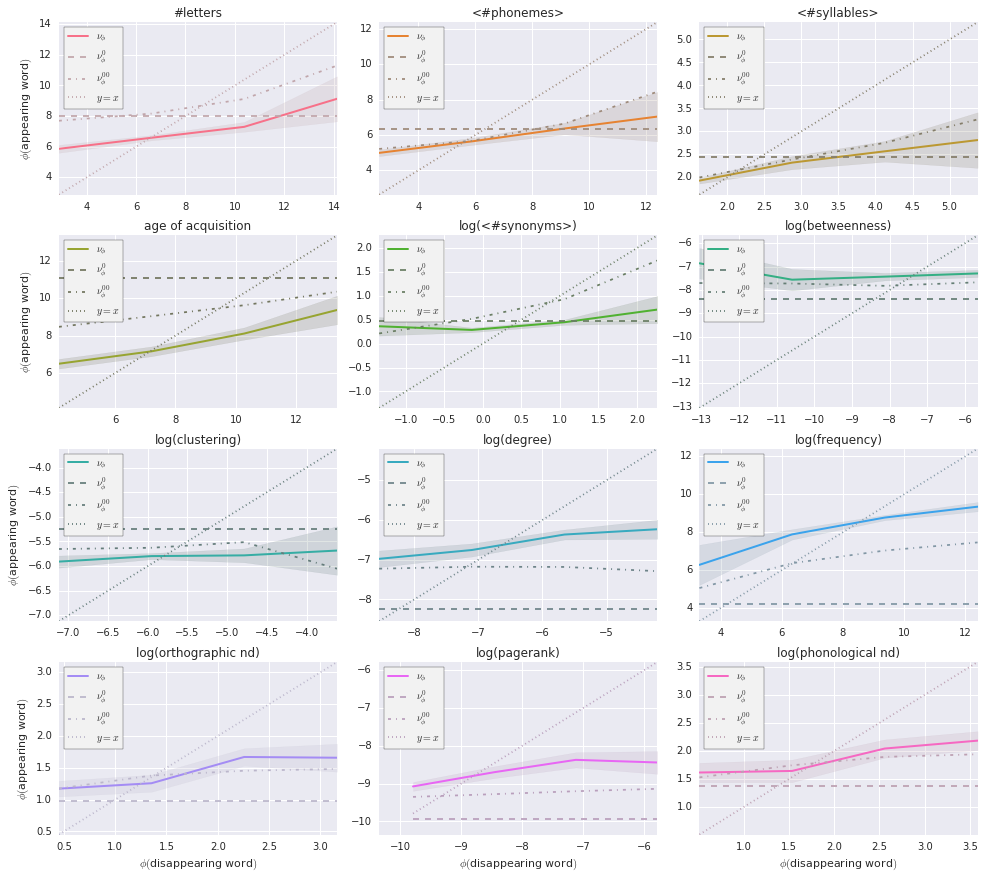

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

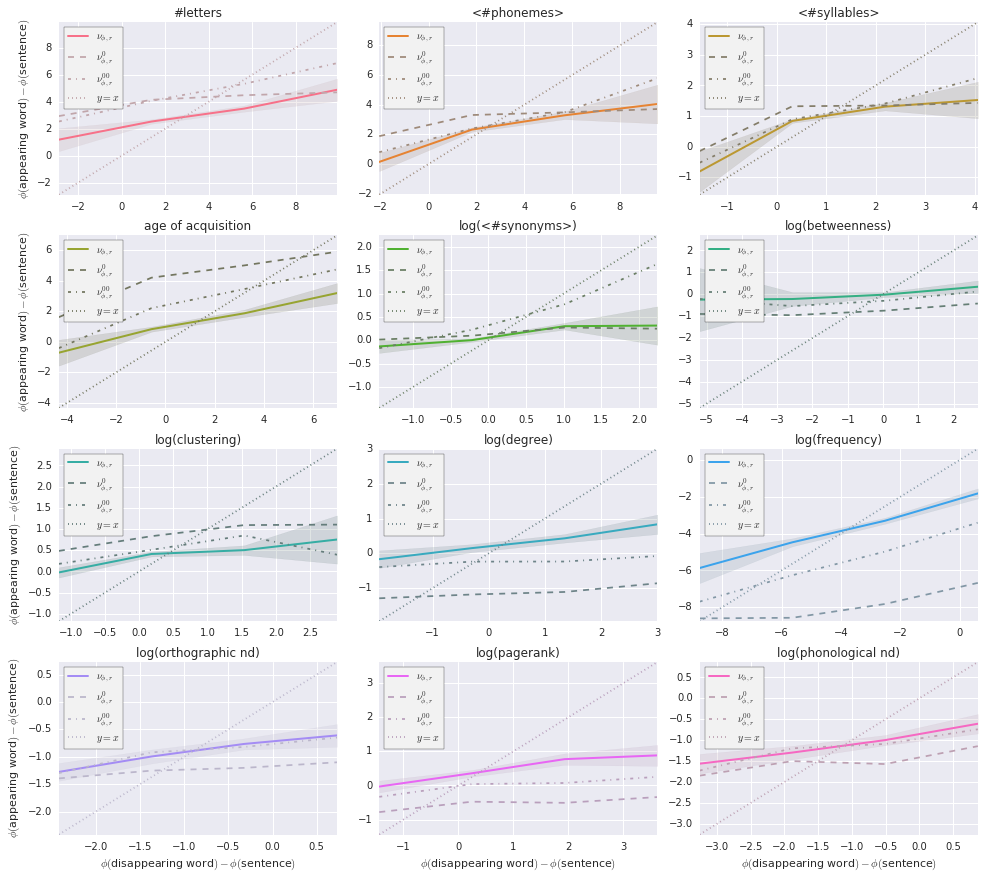

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

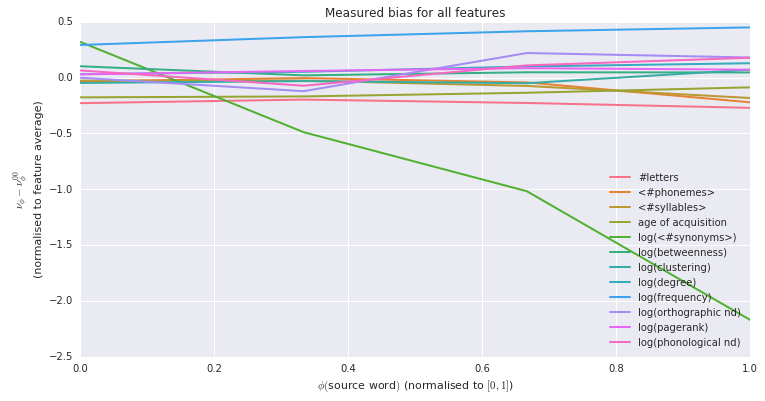

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

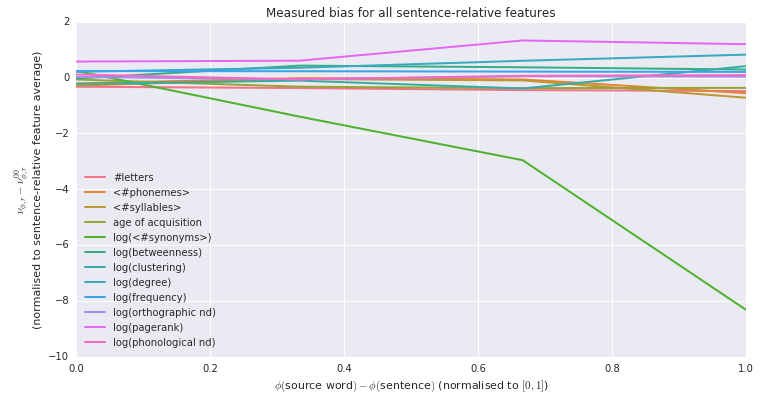

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

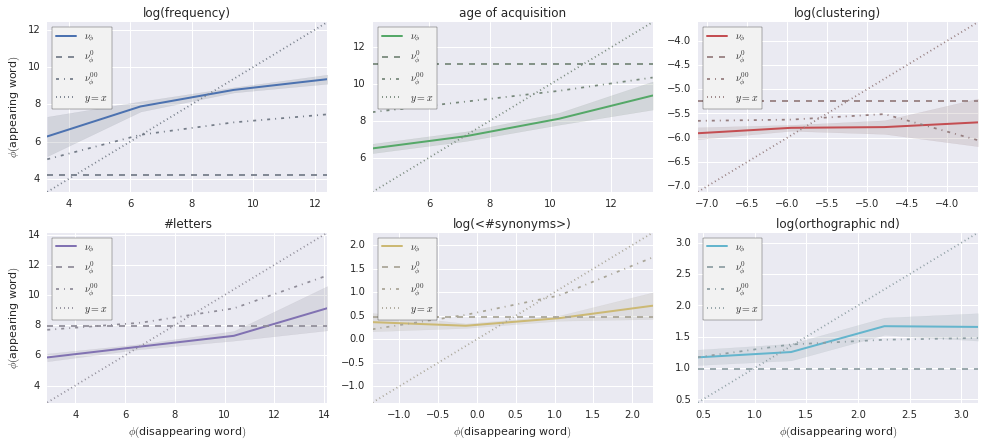

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

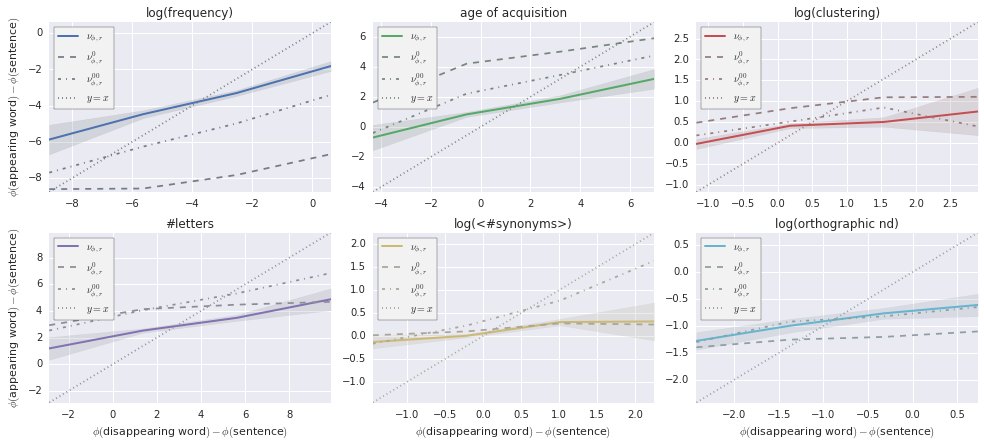

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

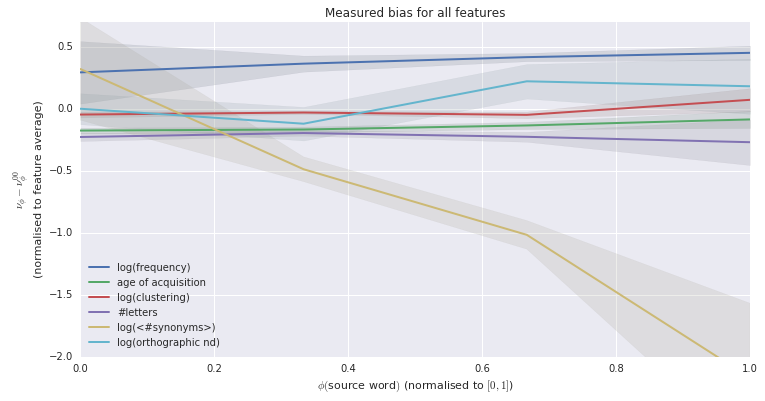

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

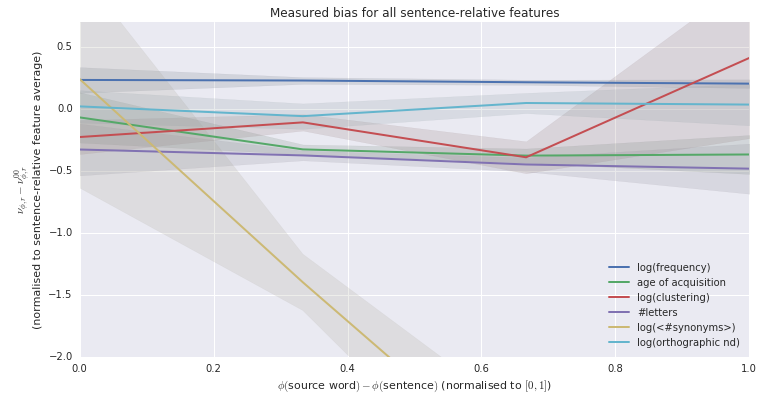

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


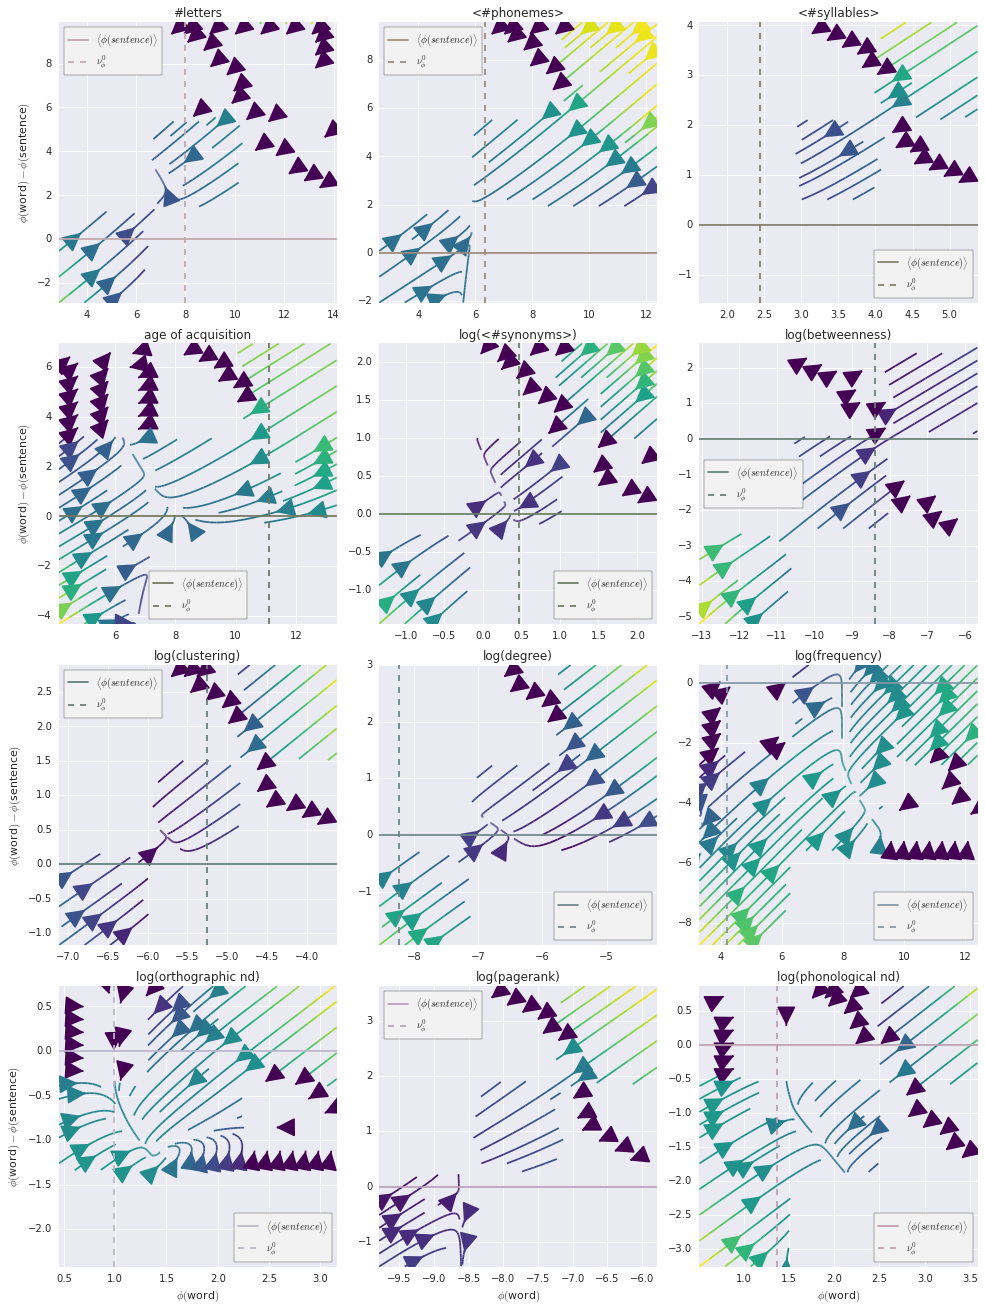

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


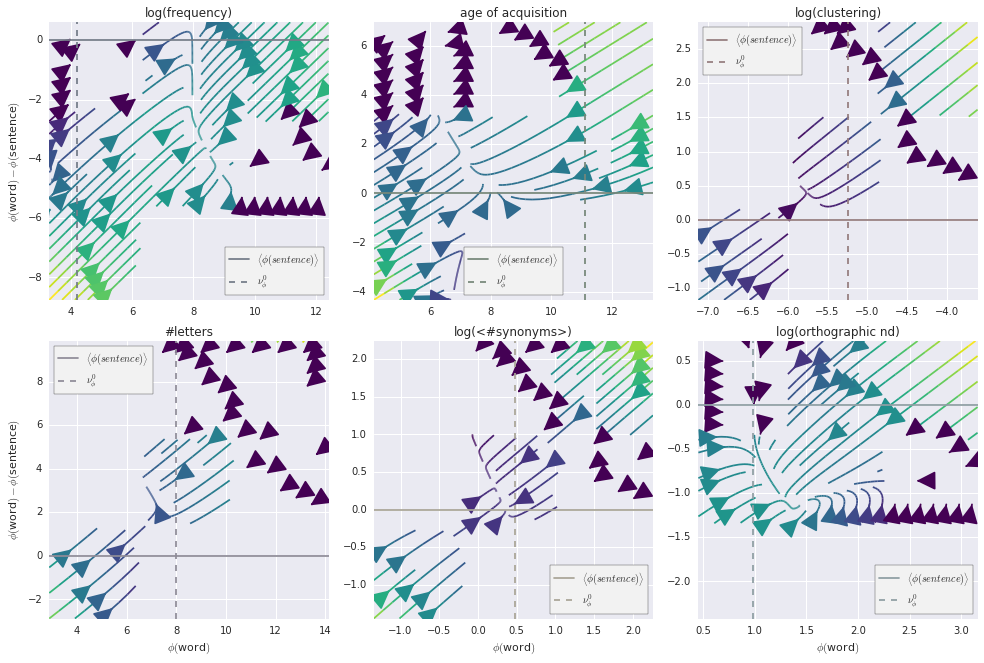

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.54580164  0.16252533  0.08018805  0.07416962  0.0337528   0.03040409
  0.01822847  0.01717751  0.01651846  0.00892946]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.428061,0.283124,-0.089287,0.245984,0.230063,-0.449748,0.222079,0.282729,-0.426097,0.276791,-0.159666,-0.001520
Component-1,0.345562,-0.374228,0.140020,-0.297188,-0.272860,-0.424109,0.153000,-0.315623,-0.428314,0.204637,-0.173023,-0.000453
Component-2,0.741852,0.238680,-0.143004,0.095416,0.585582,-0.084089,0.002602,0.050107,-0.018886,0.074275,0.014097,-0.067575


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 13005) |           | Elapsed Time: 0:00:45 ETA:  6 days, 20:50:14

  0% (  104 of 13005) |                    | Elapsed Time: 0:00:46 ETA:  0:01:20

  1% (  163 of 13005) |                    | Elapsed Time: 0:00:47 ETA:  0:01:16

  2% (  292 of 13005) |                    | Elapsed Time: 0:00:48 ETA:  0:01:05

  2% (  326 of 13005) |                    | Elapsed Time: 0:00:48 ETA:  0:01:03

  3% (  409 of 13005) |                    | Elapsed Time: 0:00:49 ETA:  0:01:11

  3% (  488 of 13005) |                    | Elapsed Time: 0:00:50 ETA:  0:01:17

  4% (  571 of 13005) |                    | Elapsed Time: 0:00:51 ETA:  0:01:20

  5% (  651 of 13005) |#                   | Elapsed Time: 0:00:52 ETA:  0:01:21

  5% (  755 of 13005) |#                   | Elapsed Time: 0:00:53 ETA:  0:01:19

  6% (  813 of 13005) |#                   | Elapsed Time: 0:00:53 ETA:  0:01:18

  7% (  930 of 13005) |#                   | Elapsed Time: 0:00:54 ETA:  0:01:15

  7% (  976 of 13005) |#                   | Elapsed Time: 0:00:55 ETA:  0:01:22

  8% ( 1061 of 13005) |#                   | Elapsed Time: 0:00:56 ETA:  0:01:24

  8% ( 1138 of 13005) |#                   | Elapsed Time: 0:00:57 ETA:  0:01:17

  9% ( 1227 of 13005) |#                   | Elapsed Time: 0:00:58 ETA:  0:01:15

 10% ( 1301 of 13005) |##                  | Elapsed Time: 0:00:58 ETA:  0:01:09

 10% ( 1386 of 13005) |##                  | Elapsed Time: 0:00:59 ETA:  0:01:09

 11% ( 1464 of 13005) |##                  | Elapsed Time: 0:01:00 ETA:  0:01:11

 12% ( 1569 of 13005) |##                  | Elapsed Time: 0:01:01 ETA:  0:01:10

 12% ( 1626 of 13005) |##                  | Elapsed Time: 0:01:02 ETA:  0:01:13

 13% ( 1734 of 13005) |##                  | Elapsed Time: 0:01:03 ETA:  0:01:08

 13% ( 1789 of 13005) |##                  | Elapsed Time: 0:01:03 ETA:  0:01:03

 14% ( 1887 of 13005) |##                  | Elapsed Time: 0:01:04 ETA:  0:01:06

 15% ( 1951 of 13005) |###                 | Elapsed Time: 0:01:05 ETA:  0:01:01

 15% ( 2042 of 13005) |###                 | Elapsed Time: 0:01:06 ETA:  0:01:05

 16% ( 2114 of 13005) |###                 | Elapsed Time: 0:01:07 ETA:  0:01:04

 16% ( 2184 of 13005) |###                 | Elapsed Time: 0:01:08 ETA:  0:01:11

 17% ( 2254 of 13005) |###                 | Elapsed Time: 0:01:09 ETA:  0:01:16

 17% ( 2276 of 13005) |###                 | Elapsed Time: 0:01:09 ETA:  0:01:23

 18% ( 2346 of 13005) |###                 | Elapsed Time: 0:01:10 ETA:  0:01:31

 18% ( 2439 of 13005) |###                 | Elapsed Time: 0:01:11 ETA:  0:01:29

 19% ( 2537 of 13005) |###                 | Elapsed Time: 0:01:12 ETA:  0:01:30

 20% ( 2601 of 13005) |####                | Elapsed Time: 0:01:13 ETA:  0:01:27

 20% ( 2711 of 13005) |####                | Elapsed Time: 0:01:14 ETA:  0:01:16

 21% ( 2764 of 13005) |####                | Elapsed Time: 0:01:14 ETA:  0:01:20

 21% ( 2848 of 13005) |####                | Elapsed Time: 0:01:15 ETA:  0:01:15

 22% ( 2927 of 13005) |####                | Elapsed Time: 0:01:16 ETA:  0:01:07

 23% ( 3040 of 13005) |####                | Elapsed Time: 0:01:17 ETA:  0:01:00

 23% ( 3089 of 13005) |####                | Elapsed Time: 0:01:18 ETA:  0:00:54

 24% ( 3209 of 13005) |####                | Elapsed Time: 0:01:19 ETA:  0:00:50

 25% ( 3252 of 13005) |#####               | Elapsed Time: 0:01:19 ETA:  0:00:48

 25% ( 3372 of 13005) |#####               | Elapsed Time: 0:01:20 ETA:  0:00:44

 26% ( 3414 of 13005) |#####               | Elapsed Time: 0:01:20 ETA:  0:00:46

 26% ( 3508 of 13005) |#####               | Elapsed Time: 0:01:21 ETA:  0:00:40

 27% ( 3577 of 13005) |#####               | Elapsed Time: 0:01:22 ETA:  0:00:37

 28% ( 3687 of 13005) |#####               | Elapsed Time: 0:01:23 ETA:  0:00:36

 28% ( 3739 of 13005) |#####               | Elapsed Time: 0:01:24 ETA:  0:00:37

 29% ( 3847 of 13005) |#####               | Elapsed Time: 0:01:25 ETA:  0:00:36

 30% ( 3902 of 13005) |######              | Elapsed Time: 0:01:25 ETA:  0:00:35

 30% ( 4021 of 13005) |######              | Elapsed Time: 0:01:26 ETA:  0:00:33

 31% ( 4065 of 13005) |######              | Elapsed Time: 0:01:26 ETA:  0:00:34

 31% ( 4159 of 13005) |######              | Elapsed Time: 0:01:27 ETA:  0:00:34

 32% ( 4227 of 13005) |######              | Elapsed Time: 0:01:28 ETA:  0:00:29

 33% ( 4354 of 13005) |######              | Elapsed Time: 0:01:29 ETA:  0:00:25

 33% ( 4390 of 13005) |######              | Elapsed Time: 0:01:29 ETA:  0:00:24

 34% ( 4484 of 13005) |######              | Elapsed Time: 0:01:30 ETA:  0:00:25

 35% ( 4552 of 13005) |#######             | Elapsed Time: 0:01:31 ETA:  0:00:24

 35% ( 4663 of 13005) |#######             | Elapsed Time: 0:01:32 ETA:  0:00:25

 36% ( 4715 of 13005) |#######             | Elapsed Time: 0:01:32 ETA:  0:00:25

 37% ( 4832 of 13005) |#######             | Elapsed Time: 0:01:33 ETA:  0:00:23

 37% ( 4877 of 13005) |#######             | Elapsed Time: 0:01:34 ETA:  0:00:18

 38% ( 5001 of 13005) |#######             | Elapsed Time: 0:01:35 ETA:  0:00:17

 38% ( 5040 of 13005) |#######             | Elapsed Time: 0:01:35 ETA:  0:00:20

 39% ( 5157 of 13005) |#######             | Elapsed Time: 0:01:36 ETA:  0:00:18

 40% ( 5202 of 13005) |########            | Elapsed Time: 0:01:36 ETA:  0:00:14

 40% ( 5314 of 13005) |########            | Elapsed Time: 0:01:37 ETA:  0:00:13

 41% ( 5365 of 13005) |########            | Elapsed Time: 0:01:38 ETA:  0:00:14

 42% ( 5474 of 13005) |########            | Elapsed Time: 0:01:39 ETA:  0:00:14

 42% ( 5528 of 13005) |########            | Elapsed Time: 0:01:40 ETA:  0:00:15

 43% ( 5625 of 13005) |########            | Elapsed Time: 0:01:41 ETA:  0:00:18

 43% ( 5690 of 13005) |########            | Elapsed Time: 0:01:41 ETA:  0:00:21

 44% ( 5777 of 13005) |########            | Elapsed Time: 0:01:42 ETA:  0:00:22

 45% ( 5853 of 13005) |#########           | Elapsed Time: 0:01:43 ETA:  0:00:23

 45% ( 5975 of 13005) |#########           | Elapsed Time: 0:01:44 ETA:  0:00:20

 46% ( 6015 of 13005) |#########           | Elapsed Time: 0:01:44 ETA:  0:00:21

 47% ( 6117 of 13005) |#########           | Elapsed Time: 0:01:45 ETA:  0:00:19

 47% ( 6178 of 13005) |#########           | Elapsed Time: 0:01:46 ETA:  0:00:18

 48% ( 6287 of 13005) |#########           | Elapsed Time: 0:01:47 ETA:  0:00:16

 48% ( 6340 of 13005) |#########           | Elapsed Time: 0:01:47 ETA:  0:00:15

 49% ( 6452 of 13005) |#########           | Elapsed Time: 0:01:48 ETA:  0:00:13

 50% ( 6503 of 13005) |##########          | Elapsed Time: 0:01:49 ETA:  0:00:08

 50% ( 6628 of 13005) |##########          | Elapsed Time: 0:01:50 ETA:  0:00:05

 51% ( 6666 of 13005) |##########          | Elapsed Time: 0:01:50 ETA:  0:00:06

 52% ( 6778 of 13005) |##########          | Elapsed Time: 0:01:51 ETA:  0:00:05

 52% ( 6828 of 13005) |##########          | Elapsed Time: 0:01:52 ETA:  0:00:11

 53% ( 6928 of 13005) |##########          | Elapsed Time: 0:01:53 ETA:  0:00:12

 53% ( 6991 of 13005) |##########          | Elapsed Time: 0:01:54 ETA:  0:00:10

 54% ( 7090 of 13005) |##########          | Elapsed Time: 0:01:55 ETA:  0:00:09

 55% ( 7153 of 13005) |###########         | Elapsed Time: 0:01:55 ETA:  0:00:12

 55% ( 7278 of 13005) |###########         | Elapsed Time: 0:01:56 ETA:  0:00:09

 56% ( 7316 of 13005) |###########         | Elapsed Time: 0:01:57 ETA:  0:00:12

 57% ( 7419 of 13005) |###########         | Elapsed Time: 0:01:58 ETA:  0:00:12

 57% ( 7478 of 13005) |###########         | Elapsed Time: 0:01:58 ETA:  0:00:13

 57% ( 7541 of 13005) |###########         | Elapsed Time: 0:01:59 ETA:  0:00:11

 58% ( 7641 of 13005) |###########         | Elapsed Time: 0:02:00 ETA:  0:00:06

 59% ( 7757 of 13005) |###########         | Elapsed Time: 0:02:01 ETA:  0:00:05

 60% ( 7803 of 13005) |############        | Elapsed Time: 0:02:01 ETA:  0:00:04

 60% ( 7913 of 13005) |############        | Elapsed Time: 0:02:02 ETA:  0:00:00

 61% ( 7966 of 13005) |############        | Elapsed Time: 0:02:03 ETA:  0:00:03

 62% ( 8090 of 13005) |############        | Elapsed Time: 0:02:04 ETA:  0:00:00

 62% ( 8129 of 13005) |############        | Elapsed Time: 0:02:04 ETA:  0:00:00

 63% ( 8245 of 13005) |############        | Elapsed Time: 0:02:05 ETA:  0:00:00

 63% ( 8291 of 13005) |############        | Elapsed Time: 0:02:06 ETA:  0:00:00

 64% ( 8390 of 13005) |############        | Elapsed Time: 0:02:07 ETA:  0:00:00

 65% ( 8454 of 13005) |#############       | Elapsed Time: 0:02:07 ETA:  0:00:00

 65% ( 8564 of 13005) |#############       | Elapsed Time: 0:02:08 ETA:  0:00:00

 66% ( 8616 of 13005) |#############       | Elapsed Time: 0:02:09 ETA:  0:00:00

 66% ( 8711 of 13005) |#############       | Elapsed Time: 0:02:10 ETA:  0:00:00

 67% ( 8779 of 13005) |#############       | Elapsed Time: 0:02:10 ETA:  0:00:00

 68% ( 8875 of 13005) |#############       | Elapsed Time: 0:02:11 ETA:  0:00:00

 68% ( 8941 of 13005) |#############       | Elapsed Time: 0:02:12 ETA:  0:00:00

 69% ( 9064 of 13005) |#############       | Elapsed Time: 0:02:13 ETA:  0:00:00

 70% ( 9104 of 13005) |##############      | Elapsed Time: 0:02:14 ETA:  0:00:00

 70% ( 9196 of 13005) |##############      | Elapsed Time: 0:02:15 ETA:  0:00:00

 71% ( 9267 of 13005) |##############      | Elapsed Time: 0:02:15 ETA:  0:00:00

 72% ( 9367 of 13005) |##############      | Elapsed Time: 0:02:16 ETA:  0:00:00

 72% ( 9429 of 13005) |##############      | Elapsed Time: 0:02:17 ETA:  0:00:00

 72% ( 9488 of 13005) |##############      | Elapsed Time: 0:02:18 ETA:  0:00:00

 73% ( 9592 of 13005) |##############      | Elapsed Time: 0:02:19 ETA:  0:00:00

 74% ( 9708 of 13005) |##############      | Elapsed Time: 0:02:20 ETA:  0:00:00

 75% ( 9754 of 13005) |###############     | Elapsed Time: 0:02:20 ETA:  0:00:00

 75% ( 9838 of 13005) |###############     | Elapsed Time: 0:02:21 ETA:  0:00:00

 76% ( 9917 of 13005) |###############     | Elapsed Time: 0:02:22 ETA:  0:00:00

 77% (10028 of 13005) |###############     | Elapsed Time: 0:02:23 ETA:  0:00:00

 77% (10079 of 13005) |###############     | Elapsed Time: 0:02:24 ETA:  0:00:00

 78% (10180 of 13005) |###############     | Elapsed Time: 0:02:25 ETA:  0:00:00

 78% (10242 of 13005) |###############     | Elapsed Time: 0:02:25 ETA:  0:00:00

 79% (10360 of 13005) |###############     | Elapsed Time: 0:02:26 ETA:  0:00:00

 80% (10404 of 13005) |################    | Elapsed Time: 0:02:27 ETA:  0:00:00

 80% (10498 of 13005) |################    | Elapsed Time: 0:02:28 ETA:  0:00:00

 81% (10567 of 13005) |################    | Elapsed Time: 0:02:28 ETA:  0:00:00

 82% (10690 of 13005) |################    | Elapsed Time: 0:02:29 ETA:  0:00:00

 82% (10730 of 13005) |################    | Elapsed Time: 0:02:30 ETA:  0:00:00

 83% (10834 of 13005) |################    | Elapsed Time: 0:02:31 ETA:  0:00:00

 83% (10892 of 13005) |################    | Elapsed Time: 0:02:31 ETA:  0:00:00

 84% (11011 of 13005) |################    | Elapsed Time: 0:02:32 ETA:  0:00:00

 85% (11055 of 13005) |#################   | Elapsed Time: 0:02:32 ETA:  0:00:00

 85% (11164 of 13005) |#################   | Elapsed Time: 0:02:33 ETA:  0:00:00

 86% (11217 of 13005) |#################   | Elapsed Time: 0:02:34 ETA:  0:00:00

 87% (11321 of 13005) |#################   | Elapsed Time: 0:02:35 ETA:  0:00:00

 87% (11380 of 13005) |#################   | Elapsed Time: 0:02:35 ETA:  0:00:00

 88% (11484 of 13005) |#################   | Elapsed Time: 0:02:36 ETA:  0:00:00

 88% (11542 of 13005) |#################   | Elapsed Time: 0:02:37 ETA:  0:00:00

 89% (11651 of 13005) |#################   | Elapsed Time: 0:02:38 ETA:  0:00:00

 90% (11705 of 13005) |##################  | Elapsed Time: 0:02:38 ETA:  0:00:00

 90% (11806 of 13005) |##################  | Elapsed Time: 0:02:39 ETA:  0:00:00

 91% (11868 of 13005) |##################  | Elapsed Time: 0:02:40 ETA:  0:00:00

 92% (11970 of 13005) |##################  | Elapsed Time: 0:02:41 ETA:  0:00:00

 92% (12030 of 13005) |##################  | Elapsed Time: 0:02:42 ETA:  0:00:00

 93% (12141 of 13005) |##################  | Elapsed Time: 0:02:43 ETA:  0:00:00

 93% (12193 of 13005) |##################  | Elapsed Time: 0:02:43 ETA:  0:00:00

 94% (12293 of 13005) |##################  | Elapsed Time: 0:02:44 ETA:  0:00:00

 95% (12355 of 13005) |################### | Elapsed Time: 0:02:45 ETA:  0:00:00

 95% (12466 of 13005) |################### | Elapsed Time: 0:02:46 ETA:  0:00:00

 96% (12518 of 13005) |################### | Elapsed Time: 0:02:46 ETA:  0:00:00

 97% (12638 of 13005) |################### | Elapsed Time: 0:02:47 ETA:  0:00:00

 97% (12680 of 13005) |################### | Elapsed Time: 0:02:48 ETA:  0:00:00

 98% (12787 of 13005) |################### | Elapsed Time: 0:02:49 ETA:  0:00:00

 98% (12843 of 13005) |################### | Elapsed Time: 0:02:49 ETA:  0:00:00

 99% (12961 of 13005) |################### | Elapsed Time: 0:02:50 ETA:  0:00:00

100% (13005 of 13005) |####################| Elapsed Time: 0:02:51 Time: 0:02:51


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

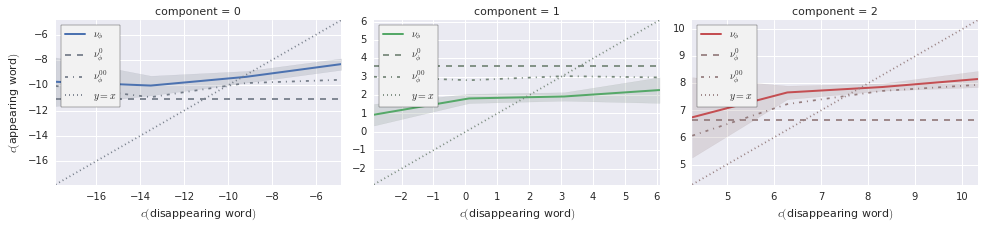

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.56204617  0.18387752  0.14666034]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.664460,-0.113936,0.348335,-0.581465,0.293296,0.007036
Component-1,0.452764,0.114163,-0.479030,-0.696272,0.259183,-0.023044
Component-2,0.586776,-0.123014,0.781179,-0.160160,0.037626,-0.057044


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 13005) |            | Elapsed Time: 0:00:13 ETA:  2 days, 1:30:03

  0% (   99 of 13005) |                    | Elapsed Time: 0:00:14 ETA:  0:01:58

  1% (  163 of 13005) |                    | Elapsed Time: 0:00:15 ETA:  0:01:47

  2% (  326 of 13005) |                    | Elapsed Time: 0:00:16 ETA:  0:01:31

  3% (  422 of 13005) |                    | Elapsed Time: 0:00:17 ETA:  0:01:36

  3% (  488 of 13005) |                    | Elapsed Time: 0:00:18 ETA:  0:01:40

  4% (  583 of 13005) |                    | Elapsed Time: 0:00:19 ETA:  0:01:42

  5% (  651 of 13005) |#                   | Elapsed Time: 0:00:19 ETA:  0:01:43

  5% (  775 of 13005) |#                   | Elapsed Time: 0:00:20 ETA:  0:01:39

  6% (  813 of 13005) |#                   | Elapsed Time: 0:00:21 ETA:  0:01:36

  7% (  935 of 13005) |#                   | Elapsed Time: 0:00:22 ETA:  0:01:34

  7% (  976 of 13005) |#                   | Elapsed Time: 0:00:22 ETA:  0:01:40

  8% ( 1088 of 13005) |#                   | Elapsed Time: 0:00:23 ETA:  0:01:39

  8% ( 1138 of 13005) |#                   | Elapsed Time: 0:00:23 ETA:  0:01:35

  9% ( 1254 of 13005) |#                   | Elapsed Time: 0:00:24 ETA:  0:01:31

 10% ( 1301 of 13005) |##                  | Elapsed Time: 0:00:25 ETA:  0:01:26

 10% ( 1405 of 13005) |##                  | Elapsed Time: 0:00:26 ETA:  0:01:24

 11% ( 1464 of 13005) |##                  | Elapsed Time: 0:00:26 ETA:  0:01:26

 12% ( 1588 of 13005) |##                  | Elapsed Time: 0:00:27 ETA:  0:01:24

 12% ( 1626 of 13005) |##                  | Elapsed Time: 0:00:28 ETA:  0:01:24

 13% ( 1750 of 13005) |##                  | Elapsed Time: 0:00:29 ETA:  0:01:20

 13% ( 1789 of 13005) |##                  | Elapsed Time: 0:00:29 ETA:  0:01:18

 14% ( 1894 of 13005) |##                  | Elapsed Time: 0:00:30 ETA:  0:01:21

 15% ( 1951 of 13005) |###                 | Elapsed Time: 0:00:30 ETA:  0:01:19

 15% ( 2057 of 13005) |###                 | Elapsed Time: 0:00:31 ETA:  0:01:21

 16% ( 2114 of 13005) |###                 | Elapsed Time: 0:00:32 ETA:  0:01:22

 16% ( 2202 of 13005) |###                 | Elapsed Time: 0:00:33 ETA:  0:01:24

 17% ( 2276 of 13005) |###                 | Elapsed Time: 0:00:34 ETA:  0:01:29

 18% ( 2368 of 13005) |###                 | Elapsed Time: 0:00:35 ETA:  0:01:31

 18% ( 2439 of 13005) |###                 | Elapsed Time: 0:00:35 ETA:  0:01:32

 19% ( 2554 of 13005) |###                 | Elapsed Time: 0:00:36 ETA:  0:01:30

 20% ( 2601 of 13005) |####                | Elapsed Time: 0:00:37 ETA:  0:01:29

 20% ( 2728 of 13005) |####                | Elapsed Time: 0:00:38 ETA:  0:01:27

 21% ( 2764 of 13005) |####                | Elapsed Time: 0:00:38 ETA:  0:01:28

 22% ( 2882 of 13005) |####                | Elapsed Time: 0:00:39 ETA:  0:01:23

 22% ( 2927 of 13005) |####                | Elapsed Time: 0:00:40 ETA:  0:01:17

 23% ( 3059 of 13005) |####                | Elapsed Time: 0:00:41 ETA:  0:01:10

 23% ( 3089 of 13005) |####                | Elapsed Time: 0:00:41 ETA:  0:01:06

 24% ( 3220 of 13005) |####                | Elapsed Time: 0:00:42 ETA:  0:01:04

 25% ( 3252 of 13005) |#####               | Elapsed Time: 0:00:42 ETA:  0:01:01

 26% ( 3383 of 13005) |#####               | Elapsed Time: 0:00:43 ETA:  0:00:59

 26% ( 3414 of 13005) |#####               | Elapsed Time: 0:00:43 ETA:  0:01:00

 27% ( 3534 of 13005) |#####               | Elapsed Time: 0:00:44 ETA:  0:00:57

 27% ( 3577 of 13005) |#####               | Elapsed Time: 0:00:45 ETA:  0:00:56

 28% ( 3708 of 13005) |#####               | Elapsed Time: 0:00:46 ETA:  0:00:55

 28% ( 3739 of 13005) |#####               | Elapsed Time: 0:00:46 ETA:  0:00:57

 29% ( 3865 of 13005) |#####               | Elapsed Time: 0:00:47 ETA:  0:00:56

 30% ( 3902 of 13005) |######              | Elapsed Time: 0:00:47 ETA:  0:00:56

 31% ( 4033 of 13005) |######              | Elapsed Time: 0:00:48 ETA:  0:00:55

 31% ( 4065 of 13005) |######              | Elapsed Time: 0:00:49 ETA:  0:00:55

 32% ( 4176 of 13005) |######              | Elapsed Time: 0:00:50 ETA:  0:00:55

 32% ( 4227 of 13005) |######              | Elapsed Time: 0:00:50 ETA:  0:00:53

 33% ( 4390 of 13005) |######              | Elapsed Time: 0:00:51 ETA:  0:00:50

 34% ( 4503 of 13005) |######              | Elapsed Time: 0:00:52 ETA:  0:00:50

 35% ( 4552 of 13005) |#######             | Elapsed Time: 0:00:52 ETA:  0:00:49

 35% ( 4681 of 13005) |#######             | Elapsed Time: 0:00:53 ETA:  0:00:49

 36% ( 4715 of 13005) |#######             | Elapsed Time: 0:00:54 ETA:  0:00:49

 37% ( 4877 of 13005) |#######             | Elapsed Time: 0:00:55 ETA:  0:00:43

 38% ( 5012 of 13005) |#######             | Elapsed Time: 0:00:56 ETA:  0:00:42

 38% ( 5040 of 13005) |#######             | Elapsed Time: 0:00:56 ETA:  0:00:43

 40% ( 5202 of 13005) |########            | Elapsed Time: 0:00:57 ETA:  0:00:38

 41% ( 5335 of 13005) |########            | Elapsed Time: 0:00:58 ETA:  0:00:38

 41% ( 5365 of 13005) |########            | Elapsed Time: 0:00:59 ETA:  0:00:38

 42% ( 5495 of 13005) |########            | Elapsed Time: 0:01:00 ETA:  0:00:38

 42% ( 5528 of 13005) |########            | Elapsed Time: 0:01:00 ETA:  0:00:39

 43% ( 5641 of 13005) |########            | Elapsed Time: 0:01:01 ETA:  0:00:41

 43% ( 5690 of 13005) |########            | Elapsed Time: 0:01:01 ETA:  0:00:43

 44% ( 5805 of 13005) |########            | Elapsed Time: 0:01:02 ETA:  0:00:43

 45% ( 5853 of 13005) |#########           | Elapsed Time: 0:01:03 ETA:  0:00:44

 46% ( 6015 of 13005) |#########           | Elapsed Time: 0:01:04 ETA:  0:00:42

 47% ( 6144 of 13005) |#########           | Elapsed Time: 0:01:05 ETA:  0:00:39

 47% ( 6178 of 13005) |#########           | Elapsed Time: 0:01:05 ETA:  0:00:39

 48% ( 6299 of 13005) |#########           | Elapsed Time: 0:01:06 ETA:  0:00:38

 48% ( 6340 of 13005) |#########           | Elapsed Time: 0:01:06 ETA:  0:00:36

 49% ( 6472 of 13005) |#########           | Elapsed Time: 0:01:08 ETA:  0:00:33

 50% ( 6503 of 13005) |##########          | Elapsed Time: 0:01:08 ETA:  0:00:32

 51% ( 6633 of 13005) |##########          | Elapsed Time: 0:01:09 ETA:  0:00:31

 51% ( 6666 of 13005) |##########          | Elapsed Time: 0:01:09 ETA:  0:00:32

 52% ( 6785 of 13005) |##########          | Elapsed Time: 0:01:10 ETA:  0:00:32

 52% ( 6828 of 13005) |##########          | Elapsed Time: 0:01:11 ETA:  0:00:38

 53% ( 6956 of 13005) |##########          | Elapsed Time: 0:01:12 ETA:  0:00:37

 53% ( 6991 of 13005) |##########          | Elapsed Time: 0:01:12 ETA:  0:00:36

 54% ( 7108 of 13005) |##########          | Elapsed Time: 0:01:13 ETA:  0:00:35

 55% ( 7153 of 13005) |###########         | Elapsed Time: 0:01:13 ETA:  0:00:38

 56% ( 7289 of 13005) |###########         | Elapsed Time: 0:01:14 ETA:  0:00:34

 56% ( 7316 of 13005) |###########         | Elapsed Time: 0:01:15 ETA:  0:00:35

 57% ( 7443 of 13005) |###########         | Elapsed Time: 0:01:16 ETA:  0:00:34

 57% ( 7478 of 13005) |###########         | Elapsed Time: 0:01:16 ETA:  0:00:34

 58% ( 7576 of 13005) |###########         | Elapsed Time: 0:01:17 ETA:  0:00:31

 58% ( 7641 of 13005) |###########         | Elapsed Time: 0:01:17 ETA:  0:00:30

 59% ( 7770 of 13005) |###########         | Elapsed Time: 0:01:18 ETA:  0:00:29

 60% ( 7803 of 13005) |############        | Elapsed Time: 0:01:19 ETA:  0:00:28

 60% ( 7930 of 13005) |############        | Elapsed Time: 0:01:20 ETA:  0:00:25

 61% ( 7966 of 13005) |############        | Elapsed Time: 0:01:20 ETA:  0:00:27

 62% ( 8100 of 13005) |############        | Elapsed Time: 0:01:21 ETA:  0:00:24

 62% ( 8129 of 13005) |############        | Elapsed Time: 0:01:21 ETA:  0:00:24

 63% ( 8259 of 13005) |############        | Elapsed Time: 0:01:22 ETA:  0:00:22

 63% ( 8291 of 13005) |############        | Elapsed Time: 0:01:23 ETA:  0:00:19

 64% ( 8411 of 13005) |############        | Elapsed Time: 0:01:24 ETA:  0:00:20

 65% ( 8454 of 13005) |#############       | Elapsed Time: 0:01:24 ETA:  0:00:20

 65% ( 8577 of 13005) |#############       | Elapsed Time: 0:01:25 ETA:  0:00:19

 66% ( 8616 of 13005) |#############       | Elapsed Time: 0:01:25 ETA:  0:00:20

 67% ( 8724 of 13005) |#############       | Elapsed Time: 0:01:26 ETA:  0:00:20

 67% ( 8779 of 13005) |#############       | Elapsed Time: 0:01:27 ETA:  0:00:22

 68% ( 8897 of 13005) |#############       | Elapsed Time: 0:01:28 ETA:  0:00:21

 68% ( 8941 of 13005) |#############       | Elapsed Time: 0:01:28 ETA:  0:00:23

 69% ( 9075 of 13005) |#############       | Elapsed Time: 0:01:29 ETA:  0:00:18

 70% ( 9104 of 13005) |##############      | Elapsed Time: 0:01:29 ETA:  0:00:19

 70% ( 9218 of 13005) |##############      | Elapsed Time: 0:01:30 ETA:  0:00:20

 71% ( 9267 of 13005) |##############      | Elapsed Time: 0:01:31 ETA:  0:00:20

 72% ( 9388 of 13005) |##############      | Elapsed Time: 0:01:32 ETA:  0:00:18

 72% ( 9429 of 13005) |##############      | Elapsed Time: 0:01:32 ETA:  0:00:17

 73% ( 9511 of 13005) |##############      | Elapsed Time: 0:01:33 ETA:  0:00:21

 73% ( 9592 of 13005) |##############      | Elapsed Time: 0:01:34 ETA:  0:00:19

 74% ( 9724 of 13005) |##############      | Elapsed Time: 0:01:35 ETA:  0:00:16

 75% ( 9754 of 13005) |###############     | Elapsed Time: 0:01:35 ETA:  0:00:18

 75% ( 9858 of 13005) |###############     | Elapsed Time: 0:01:36 ETA:  0:00:17

 76% ( 9917 of 13005) |###############     | Elapsed Time: 0:01:37 ETA:  0:00:17

 77% (10036 of 13005) |###############     | Elapsed Time: 0:01:38 ETA:  0:00:16

 77% (10079 of 13005) |###############     | Elapsed Time: 0:01:38 ETA:  0:00:16

 78% (10204 of 13005) |###############     | Elapsed Time: 0:01:39 ETA:  0:00:13

 78% (10242 of 13005) |###############     | Elapsed Time: 0:01:39 ETA:  0:00:08

 79% (10366 of 13005) |###############     | Elapsed Time: 0:01:40 ETA:  0:00:08

 80% (10404 of 13005) |################    | Elapsed Time: 0:01:41 ETA:  0:00:10

 80% (10512 of 13005) |################    | Elapsed Time: 0:01:42 ETA:  0:00:11

 81% (10567 of 13005) |################    | Elapsed Time: 0:01:42 ETA:  0:00:07

 82% (10730 of 13005) |################    | Elapsed Time: 0:01:43 ETA:  0:00:02

 83% (10856 of 13005) |################    | Elapsed Time: 0:01:44 ETA:  0:00:00

 83% (10892 of 13005) |################    | Elapsed Time: 0:01:45 ETA:  0:00:00

 85% (11055 of 13005) |#################   | Elapsed Time: 0:01:46 ETA:  0:00:00

 86% (11185 of 13005) |#################   | Elapsed Time: 0:01:47 ETA:  0:00:00

 86% (11217 of 13005) |#################   | Elapsed Time: 0:01:47 ETA:  0:00:00

 87% (11340 of 13005) |#################   | Elapsed Time: 0:01:48 ETA:  0:00:00

 87% (11380 of 13005) |#################   | Elapsed Time: 0:01:48 ETA:  0:00:00

 88% (11502 of 13005) |#################   | Elapsed Time: 0:01:49 ETA:  0:00:00

 88% (11542 of 13005) |#################   | Elapsed Time: 0:01:50 ETA:  0:00:00

 89% (11666 of 13005) |#################   | Elapsed Time: 0:01:51 ETA:  0:00:00

 90% (11705 of 13005) |##################  | Elapsed Time: 0:01:51 ETA:  0:00:00

 90% (11822 of 13005) |##################  | Elapsed Time: 0:01:52 ETA:  0:00:00

 91% (11868 of 13005) |##################  | Elapsed Time: 0:01:52 ETA:  0:00:00

 92% (11982 of 13005) |##################  | Elapsed Time: 0:01:53 ETA:  0:00:00

 92% (12030 of 13005) |##################  | Elapsed Time: 0:01:54 ETA:  0:00:00

 93% (12156 of 13005) |##################  | Elapsed Time: 0:01:55 ETA:  0:00:00

 93% (12193 of 13005) |##################  | Elapsed Time: 0:01:55 ETA:  0:00:00

 94% (12307 of 13005) |##################  | Elapsed Time: 0:01:56 ETA:  0:00:00

 95% (12355 of 13005) |################### | Elapsed Time: 0:01:56 ETA:  0:00:00

 95% (12475 of 13005) |################### | Elapsed Time: 0:01:57 ETA:  0:00:00

 96% (12518 of 13005) |################### | Elapsed Time: 0:01:58 ETA:  0:00:00

 97% (12654 of 13005) |################### | Elapsed Time: 0:01:59 ETA:  0:00:00

 97% (12680 of 13005) |################### | Elapsed Time: 0:01:59 ETA:  0:00:00

 98% (12799 of 13005) |################### | Elapsed Time: 0:02:00 ETA:  0:00:00

 98% (12843 of 13005) |################### | Elapsed Time: 0:02:00 ETA:  0:00:00

 99% (12974 of 13005) |################### | Elapsed Time: 0:02:01 ETA:  0:00:00

100% (13005 of 13005) |####################| Elapsed Time: 0:02:02 Time: 0:02:02


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

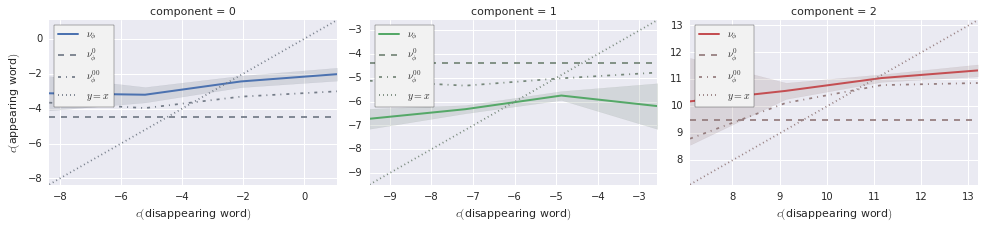

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1403 (cluster-unique) substitutions, but the PCA is in fact computed on 620 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.